# Introduction and Visualizations: codes from Prof Erik K. Grimmelmann

lossfn = ['hinge','perceptron','log','modified_huber']

In [72]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import statistics

from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [73]:
# import the Iris data set
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# set up some stuff for the plots
Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2
x_min, x_max = X.min() - 0.5, X.max() + 1.5

# #show the data
# for i in range (len(Y)):
#     print (i, X[i,:],Y[i])

In [74]:
# get Iris classifications
IC = np.unique(Y)#classes index: 0=Setosa; 1=Versicolor; 2=Virginica
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
          
# setup Iris feature lablels
IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


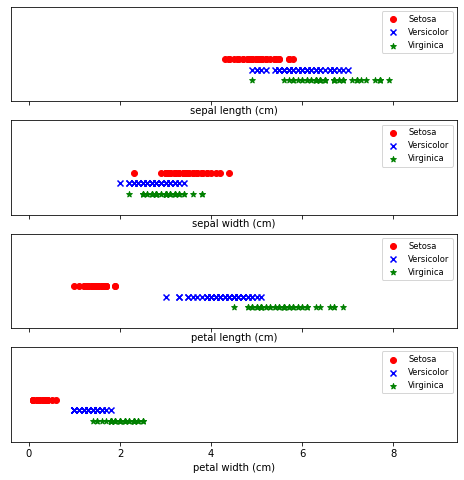

In [75]:
# plot data for all features 
plt.close('all')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize= (8,8), sharex=True)

for i in range(4):
    x1F = IrisF[i]
    ax[i].scatter(X[Y == IC[0], i], Xzeros0[Y == IC[0],i],
                  color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax[i].scatter(X[Y == IC[1], i], Xzeros1[Y == IC[1],i], 
                  color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax[i].scatter(X[Y == IC[2], i], Xzeros2[Y == IC[2],i], 
                  color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax[i].set_xlim(x_min,x_max)
    ax[i].set_ylim(-.6,+1.2)
    ax[i].set_xlabel(x1F)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].legend(loc='upper right',fontsize='small')
      
plt.show()    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


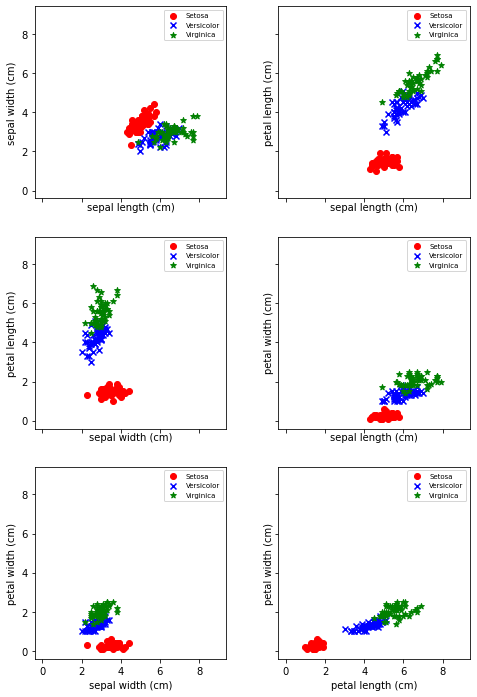

In [76]:
# plot data for all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

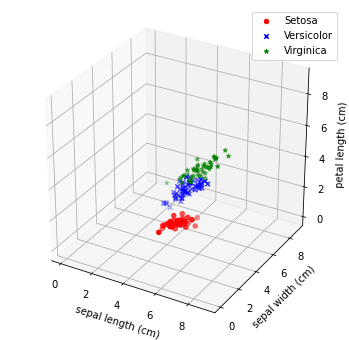

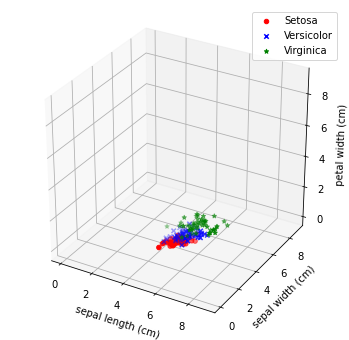

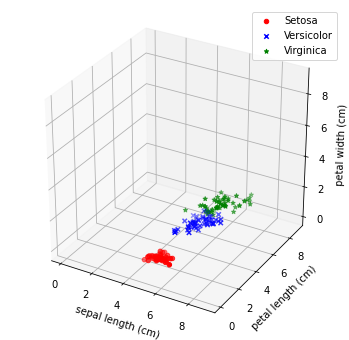

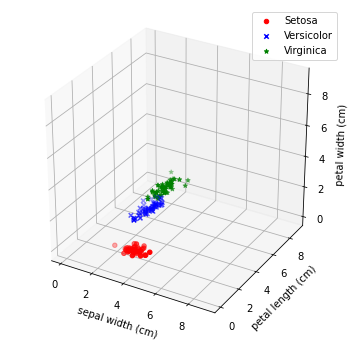

In [77]:
# plot data for all combinations of three features 

plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

plt.show()    

# Codes Provided by Prof Grimmelmann(with Modifications)


In [78]:
# choose the classes and features to be included in the model
#we are separating three classes based on two features

cdx = np.array([0,1,2])# entire data set; this array contains the classes to be considered (can be 2-3 classes)
fdx1 = np.array([0,1])#AB; this array contains the features to be considered (can be 1-4 features)
fdx2=np.array([0,2])#AC
fdx3=np.array([0,3])#AD
fdx4=np.array([1,2])#BC
fdx5=np.array([1,3])#BD
fdx6=np.array([2,3])#CD

def print_cf(cdx,fdx):
  nC = len(cdx)#always 3 classes
  nF = len(fdx)#always 2 features
  print ('\nClasses')
  for i in range(nC):
      print (cdx[i],IrisC[cdx[i]])
      
  print ('\nFeatures')
  for i in range(nF):
      print (fdx[i],IrisF[fdx[i]])

# print_cf(cdx,fdx6)

In [79]:
# build the XX and YY arrays
# these arrays contain the samples in the classes specified in cdx and include the features specified in fdx

def ml_xy(cdx,fdx):
  # nC = len(cdx)
  # nF = len(fdx)
  # #count the number of XX and YY
  # i = 0
  # numY = 0
  # for i in range(len(Y)):#Y variables:0 is Setota, 1 is Versicolor, 2 is Virginica
  #   for j in range(nC):
  #       if Y[i] == IC[cdx[j]]:
  #           numY += 1

  # YY = np.zeros((numY))
  # XX = np.zeros((numY,nF))
  # if (len(fdx) == 1):
  #   XXzeros0 = (0. * XX) + .2
  #   XXzeros1 = (0. * XX) 
  #   XXzeros2 = (0. * XX) - .2
  
  # j = 0
  # for i in range(len(Y)):
  #   for k in range(nC):
  #       if Y[i] == IC[cdx[k]]:        
  #           YY[j] = IC[cdx[k]]
  #           for m in range(nF):
  #               XX[j,m] = X[i,fdx[m]] 
  #           j += 1
  YY=iris.target
  XX=iris.data[:,(fdx[0],fdx[1])]
  return XX,YY


In [80]:
# fit the model

# clf = Perceptron(tol=1e-4, random_state=0)
lossfn = ['hinge','perceptron','log','modified_huber']
lfn = 0

def ml_score_classifier(cdx,fdx,lfn=0):
  XX,YY=ml_xy(cdx,fdx)
  # clf = SGDClassifier(lossfn[lfn],tol=1e-4, random_state=0)
  clf = SGDClassifier(loss=lossfn[lfn],tol=1e-4, random_state=0,)
  clf.fit(XX,YY)
  print (lossfn[lfn])
  print('\nScore: ',clf.score(XX,YY))
  P = clf.get_params()
  print ('\nAttributes: ',P)

  A = clf.fit(XX,YY)
  print ('\nnumber of classes ',len(A.classes_))
  print ('classes_          ',A.classes_)
  print ('n_features_in_    ',A.n_features_in_)
  print ('n_iter_           ',A.n_iter_ )
  print ('\nIntercept_')
  print (A.intercept_)
  print ('Coef_')
  print (A.coef_)
  if (len(fdx)==1):
      for i in range (len(A.intercept_)):
          print ('\nboundary      ',-A.intercept_[i]/A.coef_[i])
  ## plot data for this pair of features and classes
  plt.close('all')
  if (len(fdx) == 1):
      fig, ax = plt.subplots(figsize=(8,2))
      xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
      yy = clf.predict(xx)
      
      xxzeros1 = (0. * xx) + .5

  # plot the decision regions

      if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                      color=pltC[0], marker='.')
      if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                      color=pltC[1], marker='.')
      if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                      color=pltC[2], marker='.')   

  # plot the data

      if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                      color=pltC[0], marker=pltM[0], label=IrisC[0])
      if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                      color=pltC[1], marker=pltM[1], label=IrisC[1])
      if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                      color=pltC[2], marker=pltM[2], label=IrisC[2])    
      
      ax.set_xlim(x_min,x_max)
      ax.set_ylim(-1.,+2.)
      ax.set_xlabel(IrisF[fdx[0]])
      ax.axes.yaxis.set_visible(False)
      ax.legend(loc='upper right', fontsize='x-small')
      plt.show()    

  elif (len(fdx) == 2):
      
      fig, ax = plt.subplots(figsize=(8,8))

      xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
      yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
      yy = yy.reshape(xx1.shape)

  # plot the decision regions    
      
      if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                      color=pltCback[0], marker='.')
      if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                      color=pltCback[1], marker='.')
      if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                      color=pltCback[2], marker='.')    

  # plot the data

      if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                      color=pltC[0], marker=pltM[0], label=IrisC[0])
      if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                      color=pltC[1], marker=pltM[1], label=IrisC[1])
      if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                      color=pltC[2], marker=pltM[2], label=IrisC[2])
          
      ax.set_xlim(x_min,x_max)
      ax.set_ylim(x_min,x_max)
      ax.set_xlabel(IrisF[fdx[0]])
      ax.set_ylabel(IrisF[fdx[1]])
      ax.legend(loc='upper right', fontsize='small')
      plt.show()    
      
  elif (len(fdx) == 3):
      
      ixm = fdx[0]
      iym = fdx[1]
      izm = fdx[2]
      xF = IrisF[ixm]
      yF = IrisF[iym]
      zF = IrisF[izm]

      fig = plt.figure(figsize=(6,6))    
      ax = plt.axes(projection='3d')   

  # plot the data points

      if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
          color=pltC[0], marker=pltM[0], label=IrisC[0])
      if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
          color=pltC[1], marker=pltM[1], label=IrisC[1])
      if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
          color=pltC[2], marker=pltM[2], label=IrisC[2])    

      ax.set_xlim(x_min,x_max)
      ax.set_ylim(x_min,x_max)
      ax.set_zlim(x_min,x_max)
      ax.set_xlabel(xF)
      ax.set_ylabel(yF)
      ax.set_zlabel(zF)            
      ax.legend(loc='upper right', fontsize='small')
      plt.show() 
      
  # if there are two classes, add the decision boundary and plot again
              
      A = clf.fit(XX,YY)
      Acl =  A.classes_
      if (len(Acl) == 2):  
          
          fig = plt.figure(figsize=(6,6))    
          ax = plt.axes(projection='3d')   

      # plot the data points

          if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
              color=pltC[0], marker=pltM[0], label=IrisC[0])
          if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
              color=pltC[1], marker=pltM[1], label=IrisC[1])
          if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
              color=pltC[2], marker=pltM[2], label=IrisC[2])    

        
          Ai = A.intercept_
          Acoef = A.coef_
          xgrid = np.arange(x_min,x_max,0.05)       
          nx = len(xgrid)
          for i in range(nx):
              for j in range(nx):
                  z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                  if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

          ax.set_xlim(x_min,x_max)
          ax.set_ylim(x_min,x_max)
          ax.set_zlim(x_min,x_max)
          ax.set_xlabel(xF)
          ax.set_ylabel(yF)
          ax.set_zlabel(zF)            
          ax.legend(loc='upper right', fontsize='small')
          plt.show()  
  print("------------------")       

hinge

Score:  0.8733333333333333

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            39

Intercept_
[   9.90130384   70.17772789 -217.07607359]
Coef_
[[ 10.73694485 -23.42606149]
 [-25.19468621  18.01801802]
 [-73.29537159 148.6348372 ]]


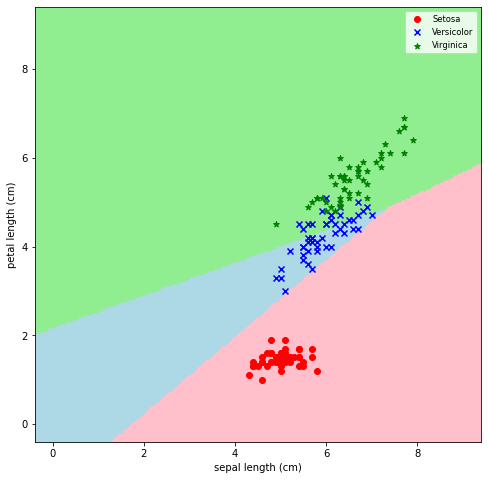

------------------


In [81]:
ml_score_classifier(np.array([0,1,2]),fdx2)

# Codes Copied from SKLearn(with Modifications)

source: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

Function to plot **"SVC with linear kernel"** VS **"LinearSVC (linear kernel)"** VS **"SVC with RBF kernel"** VS **"SVC with polynomial (degree 3) kernel"**

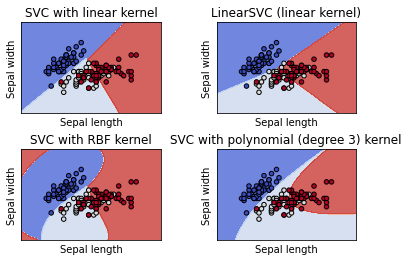

In [82]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    #numpy.meshgrid return coordinate matrices from coordinate vectors
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

xx1,yy1=ml_xy(cdx,fdx1)
X0,X1=xx1[:, 0], xx1[:, 1]
xx, yy = make_meshgrid(X0, X1)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

models = (clf.fit(xx1, yy1) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)



# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=yy1, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Building upon scikitlearn codes

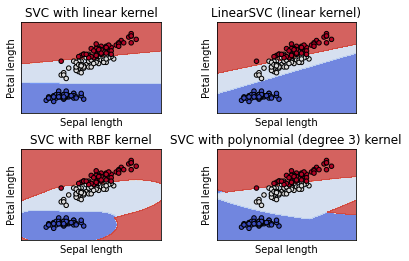

--------------------------------------


In [83]:
def svc_plot(cdx,fdx,f1,f2):
  X,y=ml_xy(cdx,fdx)
  C = 1.0  # SVM regularization parameter
  models = (
      svm.SVC(kernel="linear", C=C),
      svm.LinearSVC(C=C, max_iter=10000),
      svm.SVC(kernel="rbf", gamma=0.7, C=C),
      svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),)
  models = (clf.fit(X, y) for clf in models)

  titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",)
  # Set-up 2x2 grid for plotting.
  fig, sub = plt.subplots(2, 2)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  for clf, title, ax in zip(models, titles, sub.flatten()):
      plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
      ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel(f1)
      ax.set_ylabel(f2)
      ax.set_xticks(())
      ax.set_yticks(())
      ax.set_title(title)

  plt.show()
  print("--------------------------------------")

svc_plot(cdx,fdx2,"Sepal length","Petal length")



# Overview of ML Libraries(see textbooks)
1. **LIBLINEAR library:** a highly optimized C/C++ library developed at the National Taiwan University

source: https://www.csie.ntu.edu.tw/~cjlin/liblinear/

includes: Perceptron and LogisticRegression classes

2. **LIBSVM**: an equivalent C/C++ library specialized for SVMs

source: https://www.csie.ntu.edu.tw/~cjlin/libsvm/

includes: SVC class

The advantage of using LIBLINEAR and LIBSVM over native Python implementations is that they allow the extremely quick training of large amounts of linear classifiers. However, sometimes our datasets are too large to fit into computer memory.

3. **scikit-learn**

> includes SGDClassifier class(stochastic gradient descent version of the perceptron, logistic regression, and a support vector machine), which particularly useful when the number of samples (and the number of features) is very large



# Stochastic gradient descent using the modified-Huber loss function

**About Stochastic Gradient Descent** (SGD): an optimization algorithm that updates the model's weights **using one sample at a time**

For **batch gradient descent**, all the training samples are used for each iteration("quite computationally costly")

(source: https://scikit-learn.org/stable/modules/sgd.html AND textbook)

Although stochastic gradient descent can be considered as an approx of gradient descent, it typically reaches convergence much faster because of the more frequent weight updates. 


1. **a simple yet very efficient approach** to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.
2. **advantages and disadvantages:**
*   Advantages: (1)efficiency; (2)ease of implementation (lots of opportunities for code tuning).
*   Disadvantages: (1)SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations; (2)SGD is sensitive to feature scaling

**Review of the previous project:**

In the previous project, we have implemented SGD with hinge loss function(if you are using prof's codes). As mentioned when doing the previous assignment, there are many loss functions('hinge','perceptron','log','modified_huber').

**The concrete loss function can be set via the loss parameter.** SGDClassifier supports the following loss functions:

*   loss="hinge": (soft-margin) linear Support Vector Machine; default
*   loss="modified_huber": smoothed hinge loss, bringing tolerance to
outliers as well as probability estimates.
*   loss="log": logistic regression
*   loss='perceptron': linear loss used by the perceptron algorithm
*   loss='squared_hinge': like hinge but is quadratically penalized.



**Apply hinge loss and modified-Huber loss functions and compare**

1. dataframe comparing hinge loss and modified-Huber loss
2. processes of getting scores(modified version of Prof Grimmelmann's codes; refer back to "Codes Provided by Prof Grimmelmann" section)

In [69]:
def ml_score(XX,YY,lfn):
  clf = SGDClassifier(loss=lossfn[lfn],tol=1e-4, random_state=0)
  clf.fit(XX,YY)
  return clf.score(XX,YY)


matrix6=np.vstack((fdx1,fdx2,fdx3,fdx4,fdx5,fdx6))

def loop6(cdx,matrix6,lfn):
  print(lossfn[lfn])
  n=len(matrix6)
  score6=np.zeros(n)
  for i in range(0,n):
    XX,YY=ml_xy(cdx,matrix6[i])
    score6[i]=ml_score(XX,YY,lfn)
  return score6

hinge_score6=loop6(cdx,matrix6,lfn=0)
print(hinge_score6)
modified_huber_score6=loop6(cdx,matrix6,lfn=3)
print(modified_huber_score6)
rs_name=["sepal length vs sepal width(AB)","sepal length vs petal length(AC)","sepal length vs petal width(AD)",
         "sepal width vs petal length(BC)","sepal width vs petal width(BD)","petal length vs petal width(CD)"]
df1=pd.DataFrame(hinge_score6,index=rs_name,columns=['score(hinge_loss)'])
df2=pd.DataFrame(modified_huber_score6,index=rs_name,columns=['score(modified_huber)'])
df12=pd.concat([df1, df2], axis=1)
print(df12)

hinge
[0.77333333 0.87333333 0.94       0.88666667 0.89333333 0.96      ]
modified_huber
[0.72       0.70666667 0.72666667 0.7        0.95333333 0.88      ]
                                  score(hinge_loss)  score(modified_huber)
sepal length vs sepal width(AB)            0.773333               0.720000
sepal length vs petal length(AC)           0.873333               0.706667
sepal length vs petal width(AD)            0.940000               0.726667
sepal width vs petal length(BC)            0.886667               0.700000
sepal width vs petal width(BD)             0.893333               0.953333
petal length vs petal width(CD)            0.960000               0.880000


hinge
hinge

Score:  0.7733333333333333

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            42

Intercept_
[  82.57794743  155.04851326 -256.58748817]
Coef_
[[-85.3634383  116.06258665]
 [  2.18784185 -62.19721832]
 [ 47.95177422 -20.55076038]]


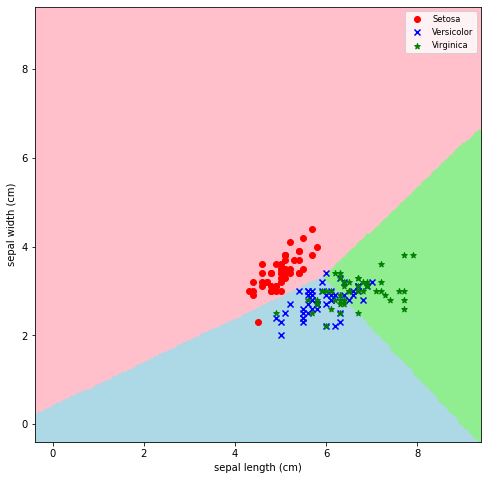

------------------
hinge

Score:  0.8733333333333333

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            39

Intercept_
[   9.90130384   70.17772789 -217.07607359]
Coef_
[[ 10.73694485 -23.42606149]
 [-25.19468621  18.01801802]
 [-73.29537159 148.6348372 ]]


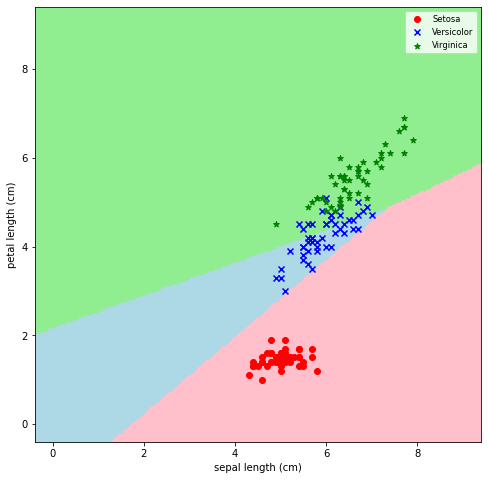

------------------
hinge

Score:  0.94

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[  37.71924272    2.5228571  -205.52541783]
Coef_
[[  5.85651537 -80.03904344]
 [  0.91617041  10.07787448]
 [ -0.48007681 146.10337654]]


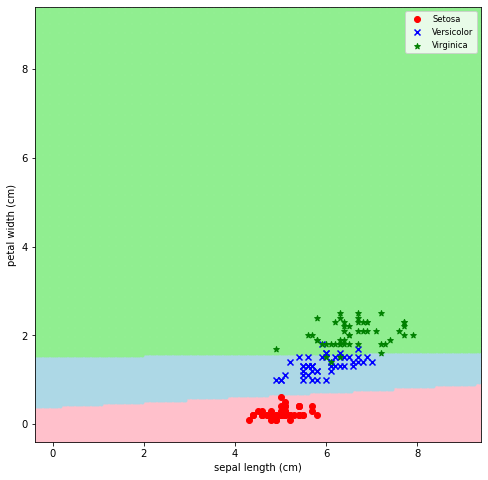

------------------
hinge

Score:  0.8866666666666667

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            28

Intercept_
[   9.90130384  161.86044657 -225.30876782]
Coef_
[[ 21.4738897  -23.42606149]
 [-50.77899596   1.34641277]
 [-71.47673635  87.88491796]]


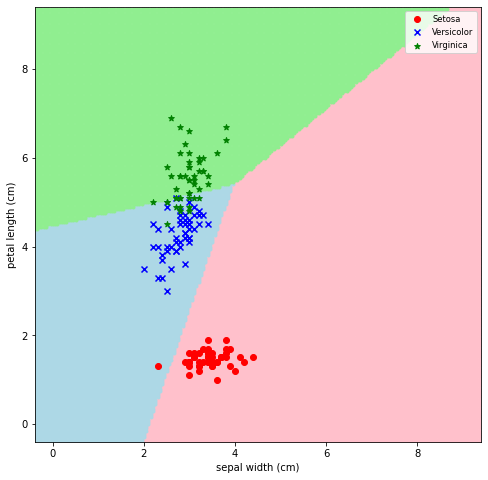

------------------
hinge

Score:  0.8933333333333333

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            36

Intercept_
[ 1.78562462e-02  1.01903178e+02 -8.57228561e+01]
Coef_
[[  4.39238653 -14.15324549]
 [-34.0678231   -4.21940928]
 [-24.93074792  98.18405663]]


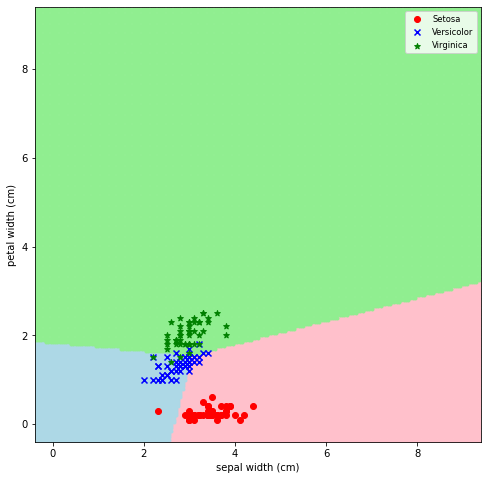

------------------
hinge

Score:  0.96

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[  66.41041234  -28.50425824 -283.81794893]
Coef_
[[-17.56954612 -20.00976086]
 [ 20.15574897 -46.26660559]
 [ 32.45560318  72.8720147 ]]


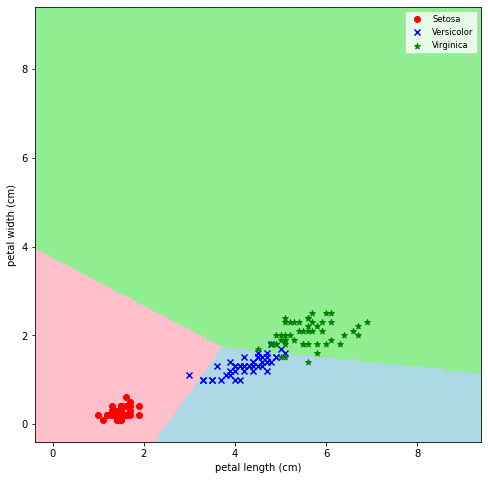

------------------


In [52]:
def processes6(cdx,matrix6,lfn=0):
  print(lossfn[lfn])
  n=len(matrix6)
  for i in range(0,n):
    ml_score_classifier(cdx,matrix6[i],lfn)

processes6(cdx,matrix6,lfn=0)

modified_huber
modified_huber

Score:  0.72

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[ 241.46861366  611.58444875 -956.78173904]
Coef_
[[-385.80596451  590.41147603]
 [  17.96435686 -227.62288929]
 [ 226.58606366 -207.98727421]]


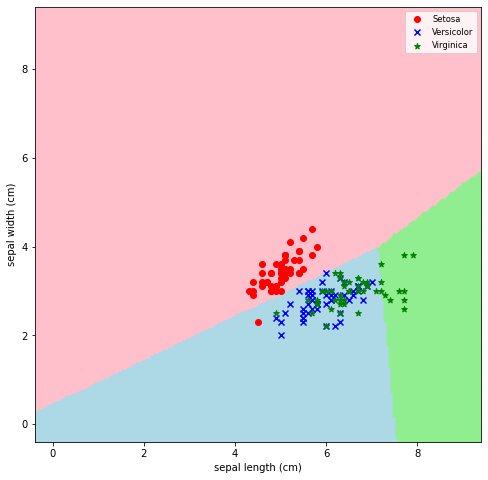

------------------
modified_huber

Score:  0.7066666666666667

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[  97.23501577  300.41642693 -799.34079436]
Coef_
[[ 120.05856515 -240.11713031]
 [ -95.89661654   87.71053767]
 [-465.83233169  687.93742517]]


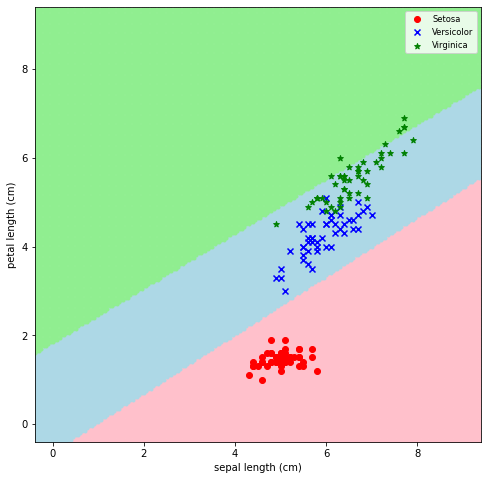

------------------
modified_huber

Score:  0.7266666666666667

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[  98.74625987   20.28252551 -775.86563365]
Coef_
[[  15.44696818 -270.89223704]
 [  12.93451215   43.90513876]
 [ -23.6698546   560.94236296]]


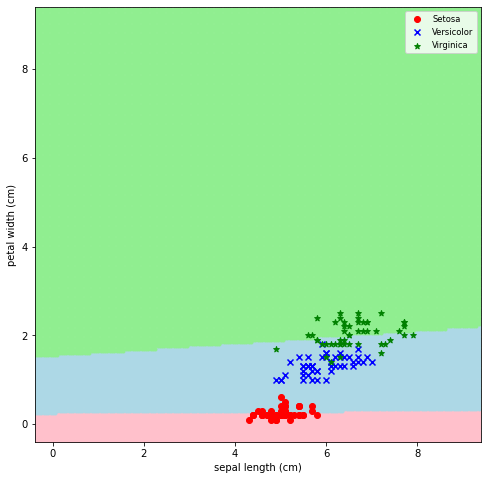

------------------
modified_huber

Score:  0.7

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            42

Intercept_
[  19.84095506  578.03641241 -898.95774809]
Coef_
[[  42.9477794   -62.46949732]
 [-218.44091647  -38.56477429]
 [-147.04042678  293.73865076]]


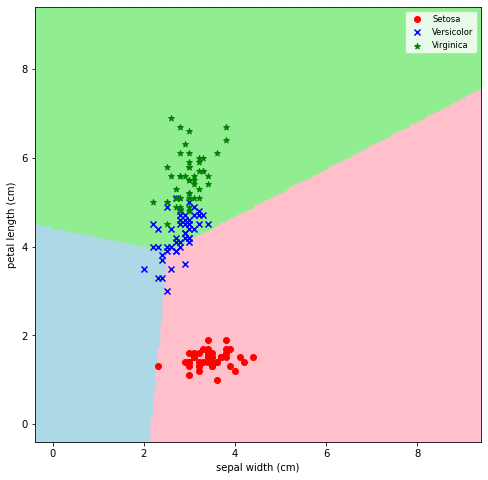

------------------
modified_huber

Score:  0.9533333333333334

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            36

Intercept_
[ -19.69672797  370.54399044 -319.6913744 ]
Coef_
[[  39.04343582 -165.93460224]
 [-118.93596011   -2.1722266 ]
 [ -86.82762545  342.31030798]]


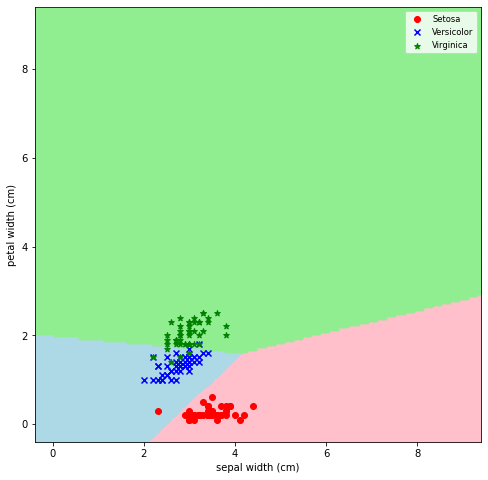

------------------
modified_huber

Score:  0.88

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[  188.97364924   -89.62639818 -1133.44888132]
Coef_
[[ -44.47304583  -58.48870594]
 [  64.19530626 -155.92669237]
 [ 142.61266209  309.99599674]]


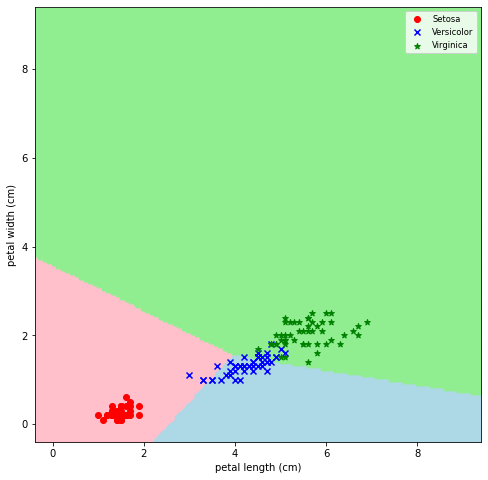

------------------


In [53]:
processes6(cdx,matrix6,lfn=3)

# Logistic regression (1): logistic regression as loss function for SGD

according to https://scikit-learn.org/stable/modules/sgd.html, setting loss='log' is equivalent to Logistic Regression.

$L(y_i,f(x_i))$
1. **hinge loss function**

$L(y_i,f(x_i))=max(0,1-y_if(x_i))$

2. **modified_huber loss function**

$L(y_i,f(x_i))=max(0,1-y_if(x_i))^2 if y_if(x_i)>1$

$L(y_i,f(x_i))=-4y_if(x_i)otherwise$

3. **log loss function**

$L(y_i,f(x_i))=log(1+exp(-y_if(x_i)))$

4. **perceptron**(not required)

$L(y_i,f(x_i))=max(0,-y_if(x_i))$

In [70]:
logreg_score6=loop6(cdx,matrix6,lfn=2)
print(logreg_score6)
df3=pd.DataFrame(logreg_score6,index=rs_name,columns=['score(log reg;SGD)'])
df123=pd.concat([df12, df3], axis=1)
print(df123)

log
[0.76666667 0.66666667 0.76       0.68666667 0.87333333 0.92666667]
                                  score(hinge_loss)  score(modified_huber)  \
sepal length vs sepal width(AB)            0.773333               0.720000   
sepal length vs petal length(AC)           0.873333               0.706667   
sepal length vs petal width(AD)            0.940000               0.726667   
sepal width vs petal length(BC)            0.886667               0.700000   
sepal width vs petal width(BD)             0.893333               0.953333   
petal length vs petal width(CD)            0.960000               0.880000   

                                  score(log reg;SGD)  
sepal length vs sepal width(AB)             0.766667  
sepal length vs petal length(AC)            0.666667  
sepal length vs petal width(AD)             0.760000  
sepal width vs petal length(BC)             0.686667  
sepal width vs petal width(BD)              0.873333  
petal length vs petal width(CD)             0.92666

log
log

Score:  0.7666666666666667

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            42

Intercept_
[  67.35487878  148.76214334 -257.38731829]
Coef_
[[-82.74342159 125.00875931]
 [  0.86029302 -56.44278387]
 [ 46.0166983  -17.74836903]]


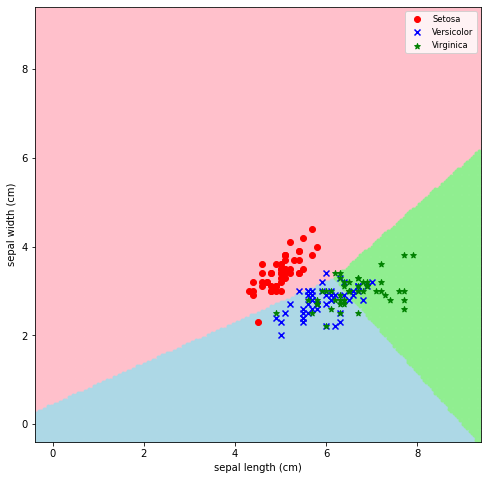

------------------
log

Score:  0.6666666666666666

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            46

Intercept_
[  24.07900313   56.99184502 -219.9866962 ]
Coef_
[[ 29.41168895 -60.25613246]
 [-45.00151662  13.33234649]
 [-64.25081391 130.72684748]]


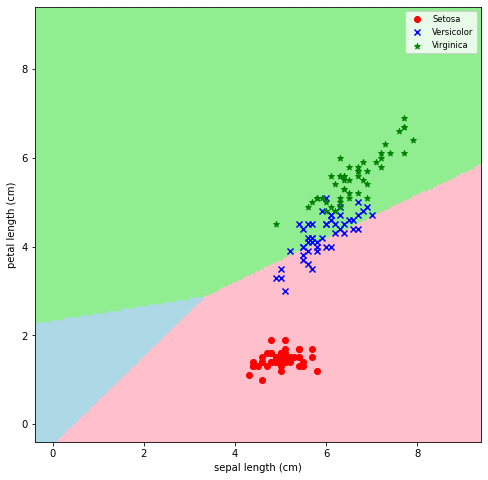

------------------
log

Score:  0.76

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[  36.24077452    6.10742524 -195.83156195]
Coef_
[[  7.04804706 -82.9041611 ]
 [ -3.25907599  11.34863323]
 [-24.72679582 166.90146341]]


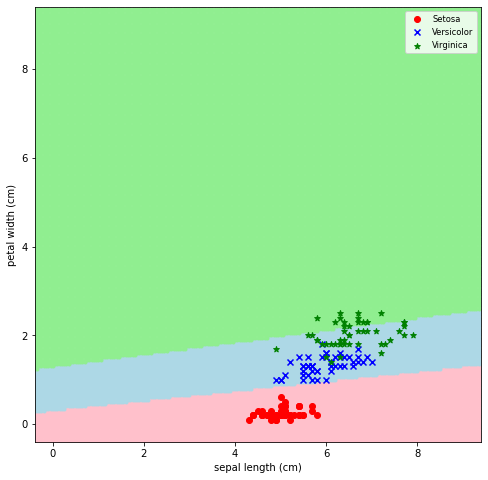

------------------
log

Score:  0.6866666666666666

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            19

Intercept_
[   4.96148567  142.74191553 -204.28703509]
Coef_
[[  10.73955894  -15.61591164]
 [ -58.13123188    1.6406446 ]
 [-101.14119498   80.27236401]]


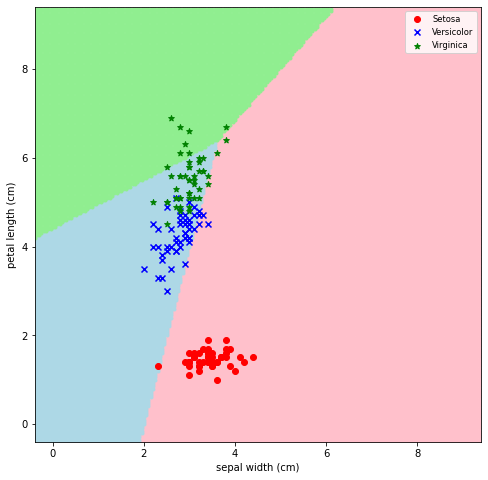

------------------
log

Score:  0.8733333333333333

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            34

Intercept_
[ -5.41705752  94.50528466 -71.98379941]
Coef_
[[  9.85054127 -39.36420343]
 [-26.44254514  -6.84678591]
 [-20.73080943  74.86995165]]


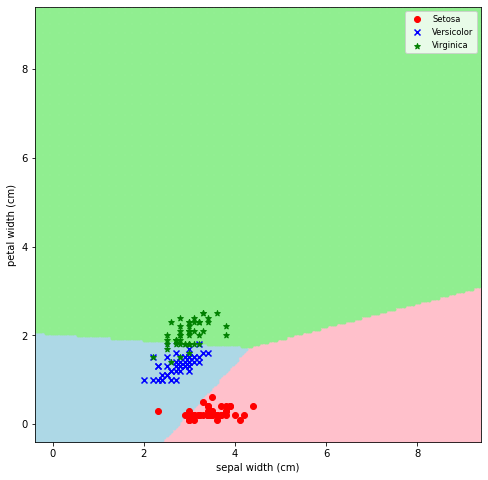

------------------
log

Score:  0.9266666666666666

Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

number of classes  3
classes_           [0 1 2]
n_features_in_     2
n_iter_            37

Intercept_
[  37.70837219  -23.30902905 -278.34676171]
Coef_
[[ -9.3849668  -12.22678831]
 [ 16.44410579 -39.26469482]
 [ 34.24396513  70.7382046 ]]


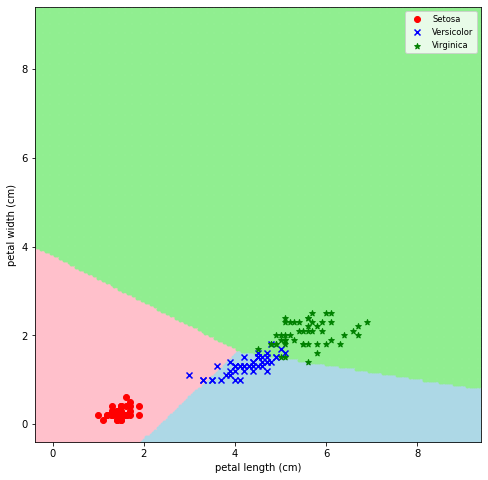

------------------


In [71]:
processes6(cdx,matrix6,lfn=2)

# Logistic regression (2): Logistic Regression

(source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic Regression (aka logit, MaxEnt(maximum-entropy classification)) classifier; a linear model for classification rather than regression.

This class implements regularized logistic regression **using the ‘liblinear’ library**, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers.

In [84]:
def ml_score_lr(XX,YY):
  #clf = SGDClassifier(loss=lossfn[lfn],tol=1e-4, random_state=0,)#penalty='l2'
  logreg = LogisticRegression(random_state=0)
  logreg.fit(XX,YY)
  return logreg.score(XX,YY)

def loop6n(cdx,matrix6):
  print("logistic regression")
  n=len(matrix6)
  score6=np.zeros(n)
  for i in range(0,n):
    XX,YY=ml_xy(cdx,matrix6[i])
    score6[i]=ml_score_lr(XX,YY)
  return score6

lg_score6=loop6n(cdx,matrix6)
print(lg_score6)
df4=pd.DataFrame(lg_score6,index=rs_name,columns=['score(log reg)'])
df1234=pd.concat([df123, df4], axis=1)
print(df1234)

logistic regression
[0.82       0.96       0.96       0.95333333 0.96       0.96666667]
                                  score(hinge_loss)  score(modified_huber)  \
sepal length vs sepal width(AB)            0.773333               0.720000   
sepal length vs petal length(AC)           0.873333               0.706667   
sepal length vs petal width(AD)            0.940000               0.726667   
sepal width vs petal length(BC)            0.886667               0.700000   
sepal width vs petal width(BD)             0.893333               0.953333   
petal length vs petal width(CD)            0.960000               0.880000   

                                  score(log reg;SGD)  score(log reg)  
sepal length vs sepal width(AB)             0.766667        0.820000  
sepal length vs petal length(AC)            0.666667        0.960000  
sepal length vs petal width(AD)             0.760000        0.960000  
sepal width vs petal length(BC)             0.686667        0.953333  
sepal widt

As mentioned previously, SGDClassifier(loss='log') results in logistic regression(according to sklearn documentaton).

 **However, as we can see from the table above, scores resulted from using SGD with log loss function to separate 3 classes are different from those using logistic regression.**

**Why would scores in column "score(log reg;SGD)" differe from those in column "score(log reg)" even though they are all logistic regression and should be equivalent?**

In the "Overview of ML Libraries" section, we have looked at ML libraries that can be used for classfication. We have learned that LogisticRegression classes make use of the LIBLINEAR library while SGDClassifier class makes use of  scikit-learn.

Since LogisticRegression class and SGDClassifier class with log loss function make use of different libaries, it makes sense that they perform differently(resulting in diff scores) even though they are equivalent to an extent. As for more details, we probably need to take some extra time and effort to find out. For now, we will keep the difference between SGDClassifier with hinge losee function and LogisticRegression in mind and move on.


# SGD with Diff Loss Functions(Analysis 1)

**Here is a brief overview of what we have done so far on SGD.**

*   SGD with hinge loss function("linear" SVMs; see details in "Stochastic gradient descent using the modified-Huber loss function" section)
*   SGD with with modified-Huber loss function(see details in "Stochastic gradient descent using the modified-Huber loss function" section)
*   SDG with log loss function(see details in "Logistic regression (1)" section )
*   Logistic Regression(see details in "Logistic regression (2)" section)

We have also discussed **the difference in SDG with log loss function and Logistic Regression**(see details in "Logistic regression (2)" section), which are considered "equivalent": use diff libraries. (Therefore, they will not be comparable.)

--------------------------------------

**In this section, we will compare SGD with diff loss functions("hinge","modified-Huber", "log", and "perceptron")**.

**Keypoints**:

1. SGD with hinge loss function is performing best in separating three classes based on two features compared with SGD with other loss functions.(powerfulness of "linear SVMs"; see deatiled discussion below)
2. SGD with log loss function("logistic regression") is doing better than SGD with perceptron loss function; "logistic regression" works even if data points are not linearly separable while "percetron" only works when the data points are linearly separable. (not required for this assignment) 

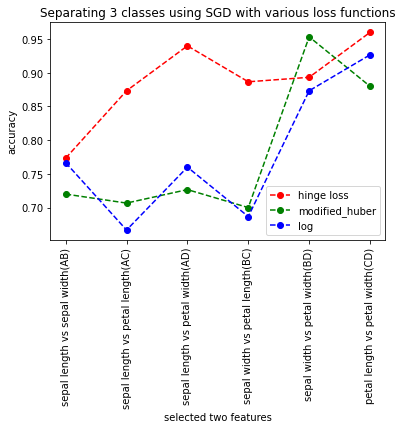

In [86]:
s_hl=df1234['score(hinge_loss)']
s_mh=df1234['score(modified_huber)']
s_log=df1234['score(log reg;SGD)']
plt.plot(rs_name,s_hl,'ro--',label='hinge loss')
plt.plot(rs_name,s_mh,'go--',label='modified_huber')
plt.plot(rs_name,s_log,'bo--',label='log')
plt.xlabel("selected two features")
plt.xticks(rotation = 90)
plt.ylabel("accuracy")
plt.title("Separating 3 classes using SGD with various loss functions")
plt.legend()
plt.show()

As we can see from the previous chart, we can see **SGD with hinge loss func(linear SVM) outperforms SGD with modified_huber and log loss functions**.

 
Here is an article from Medium that explains the diffence between SVMs and logistic regression(https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16).
*   SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point
*   SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables
*   SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.
*   The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting

**Logistic regression and SVM with a linear kernel have similar performance but depending on your features, one may be more efficient than the other.**
In this case, SVM with linear kernel(SGD with hinge loss function) outperforms logistic regression.

***Thoughts on the performance of SGD with hinge loss vs SGD with log***(kind of "naive"): 

Right now, we are separating 3 classes based on two features and our conclusion is that SVM with linear kernel(SGD with hinge loss function) outperforms logistic regression. If we take a look at the applications of logistic regression, we can see it is used in binary classification(cancer detection(0 and 1),test score(pass vs fail),spam filtering(spam vs not spam)), while SVMs seem to be more powerful and can be used in cancer detection, image classfication, and recognizing handwriting. Therefore, it will make sense for us that the use of SGD with hinge loss to separate 3 classes will be more efficient than the use of logistic regression.

In class, we have also compared Perceptron, Adaline, and Logistic Regression. Here is an overview(see in "Log Regression slides"). 
*   **Perceptron** divides classes with a hyperplane and provides no information about the confidence of the classification of a sample(works only if classes are linearly separable)
*   **Adaline**(similar to Perceptron but works even if classes are not linearly separable) finds the hyperplane that does the best job of dividing the classes and provides no information about the confidence of the classification
of a sample
*   **logistic regression** finds the hyperplane that does the best job of dividing the classes, works if classes are not linearly separable, and provides information about the confidence of the classification of a
sample

**Therefore, if we also include SGD with perceptron loss function, it will be expected to perform percetron less well than SGD with log loss function.**



In [87]:
#let us compare percetron versus logistic regression
p_score6=loop6(cdx,matrix6,lfn=1)
print(p_score6)
df_SDG=df1234.drop('score(log reg)',axis=1)
df_SDG['score(perceptron)']=p_score6
print(df_SDG)

perceptron
[0.73333333 0.76666667 0.74666667 0.91333333 0.68       0.85333333]
                                  score(hinge_loss)  score(modified_huber)  \
sepal length vs sepal width(AB)            0.773333               0.720000   
sepal length vs petal length(AC)           0.873333               0.706667   
sepal length vs petal width(AD)            0.940000               0.726667   
sepal width vs petal length(BC)            0.886667               0.700000   
sepal width vs petal width(BD)             0.893333               0.953333   
petal length vs petal width(CD)            0.960000               0.880000   

                                  score(log reg;SGD)  score(perceptron)  
sepal length vs sepal width(AB)             0.766667           0.733333  
sepal length vs petal length(AC)            0.666667           0.766667  
sepal length vs petal width(AD)             0.760000           0.746667  
sepal width vs petal length(BC)             0.686667           0.913333  
sepa

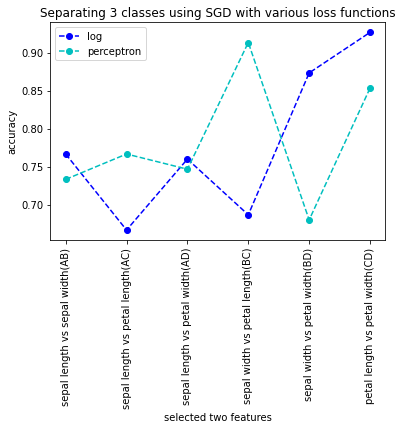

In [88]:
# plt.plot(rs_name,s_hl,'ro--',label='hinge loss')
# plt.plot(rs_name,s_mh,'go--',label='modified_huber')
plt.plot(rs_name,s_log,'bo--',label='log')
plt.plot(rs_name,p_score6,'co--',label='perceptron')
plt.xlabel("selected two features")
plt.xticks(rotation = 90)
plt.ylabel("accuracy")
plt.title("Separating 3 classes using SGD with various loss functions")
plt.legend()
plt.show()

In most cases(4 out 6), SDG with log loss fucntion is doing better than SDG with perceptron loss function in separating three classes. 

# Support vector machine (1): Linear: SGD w/ Hinge Loss and SVM w/linear kernel

**About Support vector machines (SVMs)**: supervised ML Algorithm used for classification and/or regression(preferred for classification)

source1: https://scikit-learn.org/stable/modules/svm.html

source2: https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/)


SVMs are a set of supervised learning methods used for classification, regression and outliers detection.
1. **advantages**
*   effective in high dimensional spaces
*   still effective in cases where number of dimensions is greater than the number of samples
*   uses a subset of training points in the decision function (called support vectors), so it is also memory efficient
*   versatile: different Kernel functions can be specified for the decision function
2. **disadvantages**
*   if the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial
*   SVMs do not directly provide probability estimates

---------------------------------
**About the Kernel**:

In class, the concept of kernels is introduced when we tried to solve non-linear problems; the use of kernels generally reduce the computatinal complexity. Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transform to a linear equation in a higher number of dimension spaces. Basically, It returns the inner product between two points in a standard feature dimension. 

A kernel is nothing a measure of similarity between data points. The kernel function in a kernelized SVM tell you, that given two data points in the original feature space, what the similarity is between the points in the newly transformed feature space.
*   **Radial Basis Function Kernel (RBF)**: default; the similarity between two points in the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space as shown below
*   **Polynomial kernel**: takes an additional parameter, ‘degree’ that controls the model’s complexity and computational cost of the transformation

*   **Linear kernel**: used to solve the linear problem

----------------------------------------------

***About SGD w/ Hinge Loss Function:***

**The SGD w/ hinge loss function is equivalent to linear Support Vector Machine**. We have explored SGD w/ hinge loss function in the previous assignment and the result is also re-shown in the section "Stochastic gradient descent".


***Different linear SVM classifiers***

The **linear models LinearSVC() and SVC(kernel='linear')** yield slightly different decision boundaries. This can be a consequence of the following differences:
*   LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss
*   LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction







In [61]:
def ml_score_svm1(XX,YY):
  #clf = SGDClassifier(loss=lossfn[lfn],tol=1e-4, random_state=0,)#penalty='l2'
  clf = svm.SVC(C=1,kernel="linear")
  clf.fit(XX,YY)
  return clf.score(XX,YY)

def loop6n1(cdx,matrix6):
  print("svm linear")
  n=len(matrix6)
  score6=np.zeros(n)
  for i in range(0,n):
    XX,YY=ml_xy(cdx,matrix6[i])
    score6[i]=ml_score_svm1(XX,YY)
  return score6

svm1_score6=loop6n1(cdx,matrix6)
print(svm1_score6)
df5=pd.DataFrame(svm1_score6,index=rs_name,columns=['score(svm1)'])
df12345=pd.concat([df1234, df5], axis=1)
df12345

svm linear
[0.82       0.95333333 0.96       0.96       0.96       0.96666667]


,score(hinge_loss),score(modified_huber),score(log reg;SGD),score(log reg),score(svm1)
sepal length vs sepal width(AB),0.773333,0.720000,0.766667,0.820000,0.820000
sepal length vs petal length(AC),0.873333,0.706667,0.666667,0.960000,0.953333
sepal length vs petal width(AD),0.940000,0.726667,0.760000,0.960000,0.960000
sepal width vs petal length(BC),0.886667,0.700000,0.686667,0.953333,0.960000
sepal width vs petal width(BD),0.893333,0.953333,0.873333,0.960000,0.960000
petal length vs petal width(CD),0.960000,0.880000,0.926667,0.966667,0.966667


In [89]:
def ml_score_svm11(XX,YY):
  #clf = SGDClassifier(loss=lossfn[lfn],tol=1e-4, random_state=0,)#penalty='l2'
  clf =svm.LinearSVC(C=1, max_iter=10000)
  clf.fit(XX,YY)
  return clf.score(XX,YY)

def loop6n2(cdx,matrix6):
  print("linear svc")
  n=len(matrix6)
  score6=np.zeros(n)
  for i in range(0,n):
    XX,YY=ml_xy(cdx,matrix6[i])
    score6[i]=ml_score_svm11(XX,YY)
  return score6

svm11_score6=loop6n2(cdx,matrix6)
print(svm11_score6)
df6=pd.DataFrame(svm11_score6,index=rs_name,columns=['score(linear svm)'])
df12346=pd.concat([df12345, df6], axis=1)
print(df12346)

linear svc
[0.8        0.96       0.92       0.96       0.94666667 0.94      ]
                                  score(hinge_loss)  score(modified_huber)  \
sepal length vs sepal width(AB)            0.773333               0.720000   
sepal length vs petal length(AC)           0.873333               0.706667   
sepal length vs petal width(AD)            0.940000               0.726667   
sepal width vs petal length(BC)            0.886667               0.700000   
sepal width vs petal width(BD)             0.893333               0.953333   
petal length vs petal width(CD)            0.960000               0.880000   

                                  score(log reg;SGD)  score(log reg)  \
sepal length vs sepal width(AB)             0.766667        0.820000   
sepal length vs petal length(AC)            0.666667        0.960000   
sepal length vs petal width(AD)             0.760000        0.960000   
sepal width vs petal length(BC)             0.686667        0.953333   
sepal width vs

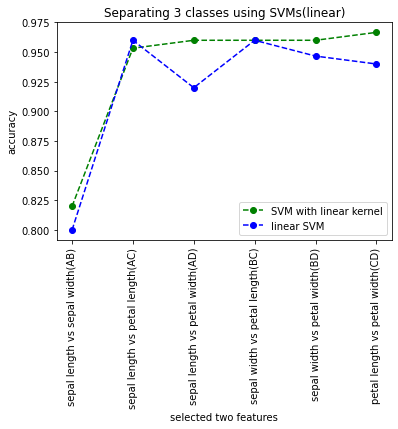

In [63]:
plt.plot(rs_name,svm1_score6,'go--',label='SVM with linear kernel')
plt.plot(rs_name,svm11_score6,'bo--',label='linear SVM')
plt.xlabel("selected two features")
plt.xticks(rotation = 90)
plt.ylabel("accuracy")
plt.title("Separating 3 classes using SVMs(linear)")
plt.legend()
plt.show()

As we can see from the dataframe and graph above, scores in the column "score(svm1)" and column "score(linear svm)", which bolsters the statement we made in the beginning of the section(**the linear models LinearSVC() and SVC(kernel='linear') yield *slightly* different decision boundaries**).

**SDG with hinge loss function is equivalent to linear SVM(according to SKLearn) but the scores in column "score(hinge_loss)" and column "score(svm1)"(or column "score(linear svm)") are quite different. **

Similar to discussion of SGD with log loss function versus logistic regression, we can attribute the difference in scores to the use of different libraries. SGD with log loss function uses Scikit-learn library while SVms makes use of makes use of LIBSVM. More research needs to be done on that.

# Support vector machine (2): Polynomial and RBF

**When training an SVM with the Radial Basis Function (RBF) kernel**, two parameters must be considered: C and gamma. **The parameter C**, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. **gamma defines how much influence a single training example has**. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance.

In [64]:
def ml_score_svmpo(XX,YY):
  #clf = SGDClassifier(loss=lossfn[lfn],tol=1e-4, random_state=0,)#penalty='l2'
  clf = svm.SVC(kernel="poly", degree=3, gamma="auto", C=1)
  clf.fit(XX,YY)
  return clf.score(XX,YY)

def loop6n3(cdx,matrix6):
  print("svc poly3")
  n=len(matrix6)
  score6=np.zeros(n)
  for i in range(0,n):
    XX,YY=ml_xy(cdx,matrix6[i])
    score6[i]=ml_score_svmpo(XX,YY)
  return score6

svmp_score6=loop6n3(cdx,matrix6)
print(svmp_score6)
df7=pd.DataFrame(svmp_score6,index=rs_name,columns=['score(svm pol3)'])
df12347=pd.concat([df12346, df7], axis=1)
df12347

svc poly3
[0.81333333 0.96666667 0.96       0.95333333 0.96       0.96      ]


,score(hinge_loss),score(modified_huber),score(log reg;SGD),score(log reg),score(svm1),score(linear svm),score(svm pol3)
sepal length vs sepal width(AB),0.773333,0.720000,0.766667,0.820000,0.820000,0.800000,0.813333
sepal length vs petal length(AC),0.873333,0.706667,0.666667,0.960000,0.953333,0.960000,0.966667
sepal length vs petal width(AD),0.940000,0.726667,0.760000,0.960000,0.960000,0.920000,0.960000
sepal width vs petal length(BC),0.886667,0.700000,0.686667,0.953333,0.960000,0.960000,0.953333
sepal width vs petal width(BD),0.893333,0.953333,0.873333,0.960000,0.960000,0.946667,0.960000
petal length vs petal width(CD),0.960000,0.880000,0.926667,0.966667,0.966667,0.940000,0.960000


In [90]:
def ml_score_svmrbf(XX,YY):
  #clf = SGDClassifier(loss=lossfn[lfn],tol=1e-4, random_state=0,)#penalty='l2'
  clf = svm.SVC(kernel="rbf", gamma=0.7, C=1)
  clf.fit(XX,YY)
  return clf.score(XX,YY)

def loop6n4(cdx,matrix6):
  print("svc rbf")
  n=len(matrix6)
  score6=np.zeros(n)
  for i in range(0,n):
    XX,YY=ml_xy(cdx,matrix6[i])
    score6[i]=ml_score_svmrbf(XX,YY)
  return score6

svmr_score6=loop6n4(cdx,matrix6)
print(svmr_score6)
df8=pd.DataFrame(svmr_score6,index=rs_name,columns=['score(svm rbf)'])
df12348=pd.concat([df12347, df8], axis=1)
print(df12348)


svc rbf
[0.82666667 0.96       0.96       0.95333333 0.96       0.96666667]
                                  score(hinge_loss)  score(modified_huber)  \
sepal length vs sepal width(AB)            0.773333               0.720000   
sepal length vs petal length(AC)           0.873333               0.706667   
sepal length vs petal width(AD)            0.940000               0.726667   
sepal width vs petal length(BC)            0.886667               0.700000   
sepal width vs petal width(BD)             0.893333               0.953333   
petal length vs petal width(CD)            0.960000               0.880000   

                                  score(log reg;SGD)  score(log reg)  \
sepal length vs sepal width(AB)             0.766667        0.820000   
sepal length vs petal length(AC)            0.666667        0.960000   
sepal length vs petal width(AD)             0.760000        0.960000   
sepal width vs petal length(BC)             0.686667        0.953333   
sepal width vs pe

# Support vector machine (3): Visualizations of Linear, Polynomial(degree 3) and RBF boundaries

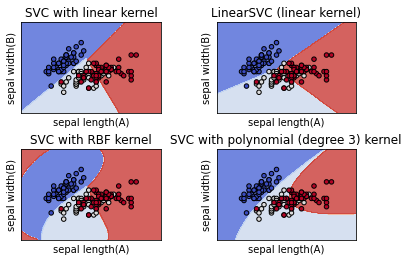

--------------------------------------


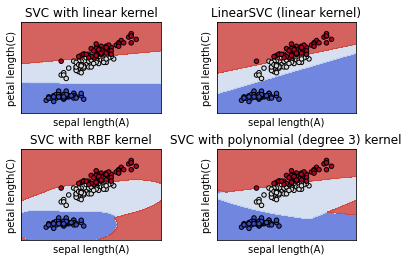

--------------------------------------


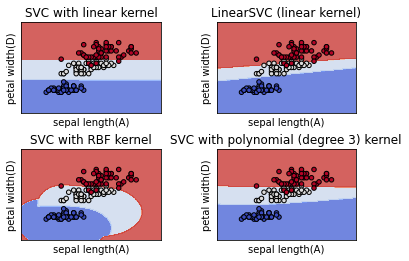

--------------------------------------


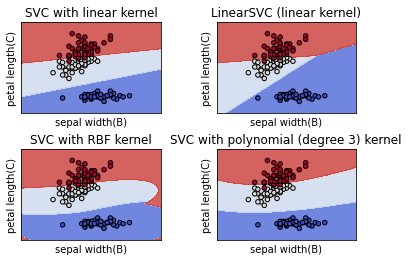

--------------------------------------


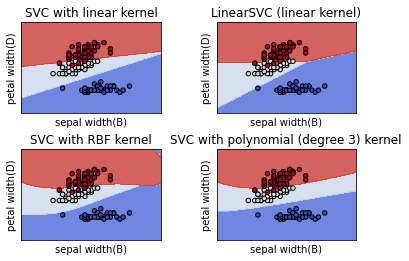

--------------------------------------


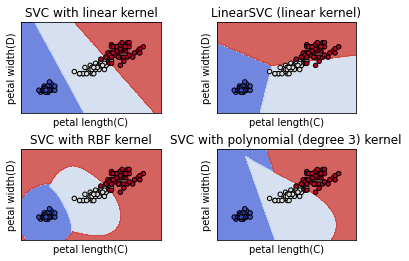

--------------------------------------


In [66]:
f1="sepal length(A)"
f2="sepal width(B)"
f3="petal length(C)"
f4="petal width(D)"
svc_plot(cdx,fdx1,f1,f2)
svc_plot(cdx,fdx2,f1,f3)
svc_plot(cdx,fdx3,f1,f4)
svc_plot(cdx,fdx4,f2,f3)
svc_plot(cdx,fdx5,f2,f4)
svc_plot(cdx,fdx6,f3,f4)

# SVMs with Different Kernels:(Analysis 2)

**Here is a summary of what we have done so far on SVMs with diff kernels.**

*   SVMs with linear kernel(see more details in section "Support vector machine (1)")

> The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries(both are linear SVMs)


*   SVMs with polynomial kernel(degree 3)(see more details in section "Support vector machine (2)")

*   SVMs with RBF kernel(see more details in section "Support vector machine (2)")
*   Visualizatins of SVMs with diff kernels(see more details in section "Support vector machine (3)")

In addition, we have discussed the diff in scores of linear SVMs and SDG with hinge loss function(which are considered equivalent): diff libraries.

---------------------------------------
**In this section, we will compare SVMs with diff kernels(linear, polynomial, RBF).**

**Keypoints:**

1. **SVMs with diff kernels are doing equally well in separating 3 classes based on 2 features;** separating 3 classes based on 2 features(our scenerio) is a "**linear problem**". 
2. **Some questions:**
*   for SVM with polynomial kernel: how would increase in degree affects accuracy? Up to what degree, increasing computational complexity from increasing in degree wouuld make it unworthy(if an increase in degree leads to an increase in accuracy)? In other words, how we can find the optimal degree? 
*   When solving some non-linear problems with a SVMs, how would the performance of SVMs with diff kernels differ?




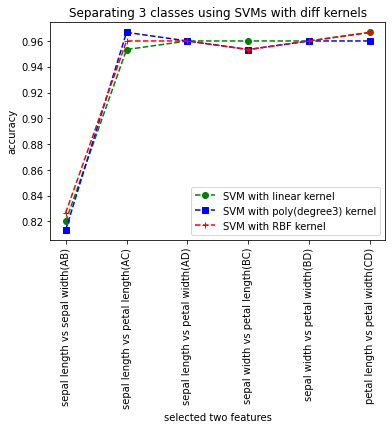

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


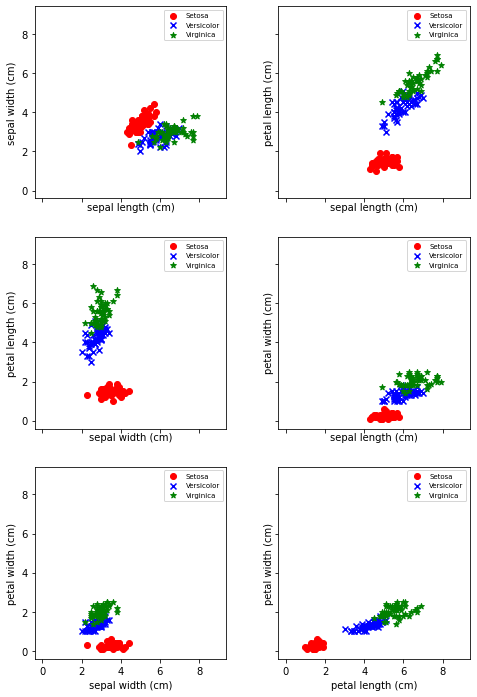

In [67]:
#plt.figure(figsize=(8,8))
plt.plot(rs_name,svm1_score6,'go--',label='SVM with linear kernel')
plt.plot(rs_name,svmp_score6,'bs--',label='SVM with poly(degree3) kernel')
plt.plot(rs_name,svmr_score6,'r+--',label='SVM with RBF kernel',)
plt.xlabel("selected two features")
plt.xticks(rotation = 90)
plt.ylabel("accuracy")
plt.title("Separating 3 classes using SVMs with diff kernels")
plt.legend()
plt.show()

# plot data for all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

As we can see from the graph above, SVMs with diff kernels(linear, polynomial with degree 3, and RBF) are performing "almost equally" well in separating 3 classes based on 2 features, which can be indicated by similar scores. 

**Why "almost equally"?**

Take a look at the subplot graph above. We can categorize the problem of separating 3 classes based on 2 features as "linear". Therefore, it makes sense that SVMs with different kernels perform almost equally well and result in similar scores.

Some questions that can be asked:
1. for SVM with polynomial kernel: **would higher degree result in high scores?** (Higher degree means more complexity and computational cost) The answer to this question seems to be self-explanatory. However, after we have proved our assumption, we can move on the next question: **up to what degree, increasing the degree would not be worth it?**
2. We can also try some non-linear problems with a SVMs and compare the performance of SVMs with diff kernels.



# SGDs versus SVMs: (Analysis 3)

For SGDs and SVMs, we have done the comparisons within their own domain: comparing SGDs with diff loss functions and comparing SVMs with diff kernels. 

**Now let us compare SGDs and SVMs.**

**KeyPoints:**
1. SVMs is doing better than SDGs in our problem of separating three Iris classes based on two features. (see detailed discussion of SVM VS SDG below)
2. **question(s)**
*   How can we determine which ML algorithm will perform best in classfication in each scenerio(diff sample size, linear vs nonlinear, diff number of features)? 



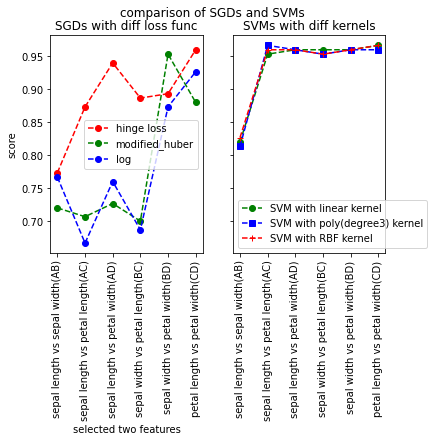

In [68]:
fig, (ax0,ax1)=plt.subplots(1,2,sharey=True)
ax0.plot(rs_name,s_hl,'ro--',label='hinge loss')
ax0.plot(rs_name,s_mh,'go--',label='modified_huber')
ax0.plot(rs_name,s_log,'bo--',label='log')
ax0.set_ylabel("score")
ax0.set_xlabel("selected two features")
ax0.set_xticklabels(rs_name,rotation=90)
ax0.title.set_text("SGDs with diff loss func")
ax0.legend()

ax1.plot(rs_name,svm1_score6,'go--',label='SVM with linear kernel')
ax1.plot(rs_name,svmp_score6,'bs--',label='SVM with poly(degree3) kernel')
ax1.plot(rs_name,svmr_score6,'r+--',label='SVM with RBF kernel')
ax1.set_xticklabels(rs_name,rotation=90)
ax1.title.set_text("SVMs with diff kernels")
ax1.legend()

fig.suptitle("comparison of SGDs and SVMs")
plt.show()

As we can see from the subplots above, SVMs is doing better in separating 3 classes based on two features than SGDs. Both subplots have shared y axis and graphs for SVMs wit diff kernels situate higher compared with graphs for SGDs with diff loss functions.

Source: https://towardsdatascience.com/using-stochastic-gradient-descent-to-train-linear-classifiers-c80f6aeaff76

Even though SVMs are doing better than SDGs in our problem, it does not mean that SVMs are doing better than SDGs in all problems. As mentioned in the section "Stochastic gradient descent", SDGs are simple yet very efficient approach, whose advantage will shine through, especially in the scenerios where we have large-scale data sets (> 10⁵ samples or with a large number > 10⁵ of features). 

In our example, we have less than a few thousand samples or features(150 samples and 3 features); it makes sense that SVMs is performing quite well. As mentioned in "Overview of ML Libraries" section, SVM class implements LIBSVM library, which is powerful but does not scale well for large data sets or feature vectors.

Now we have a general sense of the performance of different ML learning algorithms(SDGs, percetron, SVMs). Next question to ask is that

> There are many different scenerios(diff sample size, diff number of features, linear vs nonlinear problem and ect). **How can we determine which ML algorithm will perform best in classfication in each scenerio?**






# Conclusion and Future Research

**Here is a summary of our findings**:

**(please note that the following insights are based on the analysis of Iris datasetes; we are separating 3 Iris classes based on two features; it may or may not apply to other scenarios)**

1. SGD with hinge loss function is performing best in separating three classes based on two features compared with SGD with other loss functions.*(see more details in section "SGD with Diff Loss Functions(Analysis 1)")*
2. SGD with log loss function("logistic regression") is doing better than SGD with perceptron loss function. *(See more details in section "SGD with Diff Loss Functions(Analysis 1)")*
3. SVMs with diff kernels are doing equally well in separating 3 classes based on 2 features--we are solving a linear problem. *(See more details in "SVMs with Different Kernels:(Analysis 2)" section)*
4. SVMs is doing better than SGDs--powerfulness of SVMs, small sample size, not too many features. *(See more deatils in section "SGDs versus SVMs: (Analysis 3)")*
5. SVMs with log loss func is considered to be equivalent to logistic regression but those two algorithms give us quite different scores because they use diff libraries(same for (1)SVMs with linear kernel vs SGDs with hinge loss func and (2)SVMs with perceptron loss function and percetron). *(See detailed discussion in section "Logistic regression (2)" and section "Support vector machine (1)")*

-------------------
**Future research:**

1. for SVM with polynomial kernel, how we can find the optimal degree so that we can maximize the score while not increasing the complexity of the problem too much?
2. When solving some non-linear problems with a SVMs, how would the performance of SVMs with diff kernels differ?
3. How can we determine which ML algorithm will perform best in classfication in the scenerios (of diff sample size, diff number of features, and linear vs nonlinear problem)?